In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df_test=pd.read_csv("/Users/kimjong-gyu/Desktop/airbnb-recruiting-new-user-bookings/test_users.csv")
df_train=pd.read_csv("/Users/kimjong-gyu/Desktop/airbnb-recruiting-new-user-bookings/train_users_2.csv")
df_session=pd.read_csv("/Users/kimjong-gyu/Desktop/airbnb-recruiting-new-user-bookings/sessions.csv")



In [2]:
df_train.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')

In [3]:
df = pd.concat((df_train,df_test ), axis=0, ignore_index=True)

In [4]:
df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [5]:
df.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         186639
gender                          0
age                        116866
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6085
signup_app                      0
first_device_type               0
first_browser                   0
country_destination         62096
dtype: int64

In [440]:
df.age.describe()

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

In [441]:
#1000살 이상을 처리해야한다. 
df.loc[df['age'] > 1000]['age'].describe()

count     828.000000
mean     2007.117150
std        22.219408
min      1920.000000
25%      2014.000000
50%      2014.000000
75%      2014.000000
max      2014.000000
Name: age, dtype: float64

In [442]:
df.loc[df['age'] < 18]['age'].describe()

count    188.000000
mean      12.718085
std        5.764569
min        1.000000
25%        5.000000
50%       16.000000
75%       17.000000
max       17.000000
Name: age, dtype: float64

In [443]:
df_with_year = df['age'] > 1000
df.loc[df_with_year, 'age'] = 2015 - df.loc[df_with_year, 'age']

In [444]:
## After that, the Minimum age at 1 and Maximum age at 150 were not realistic, we will set limit for the age, and set nan for outliers.
df.age.describe()


count    158681.000000
mean         36.713274
std          14.046364
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max         150.000000
Name: age, dtype: float64

In [445]:
## 16 ~ 95살 까지만 따진다. 
df.loc[df.age > 95, 'age'] = np.nan
df.loc[df.age < 16, 'age'] = np.nan
df['age'].unique()

array([nan, 38., 56., 42., 41., 46., 47., 50., 36., 37., 33., 31., 29.,
       30., 40., 26., 32., 35., 59., 49., 44., 34., 28., 19., 53., 52.,
       39., 57., 25., 54., 69., 63., 43., 55., 65., 58., 61., 18., 27.,
       45., 60., 48., 51., 64., 72., 70., 67., 73., 66., 68., 95., 24.,
       94., 75., 79., 62., 16., 23., 76., 74., 87., 92., 71., 84., 78.,
       82., 77., 22., 89., 21., 20., 17., 86., 81., 90., 88., 80., 91.,
       83., 85., 93.])

In [446]:
## nan값에 전체의 평균값으로 채우기 위해 바꿔준다. 
av = df.age.values
print(df[:213451].age.describe())
mean_age=int(df[:213451].age.mean())

count    122987.000000
mean         36.523714
std          11.588499
min          16.000000
25%          28.000000
50%          34.000000
75%          42.000000
max          95.000000
Name: age, dtype: float64


In [447]:
df.age=df.age.fillna(value=mean_age)
df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,36.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


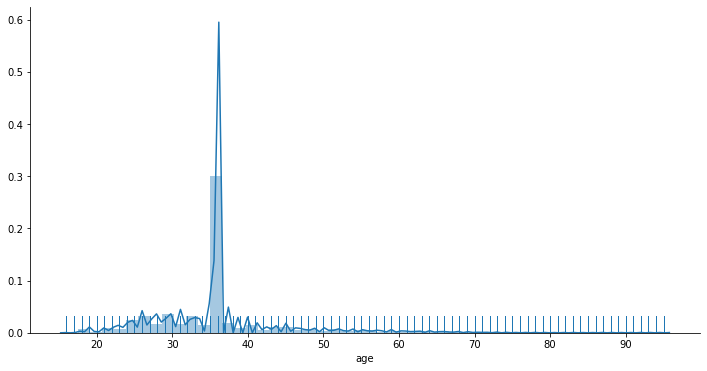

In [448]:
## 나이 결과값을 시각적 그래프로 그렸을때의 모습
plt.figure(figsize=(12,6))
sns.distplot(df.age.dropna(), rug=True)
sns.despine()

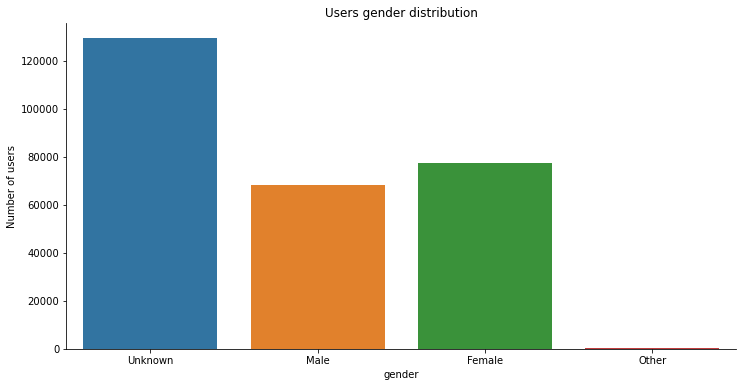

In [449]:
#Gender 처리 
plt.figure(figsize=(12,6))
df["gender"] = df['gender'].fillna('M')
sns.countplot(data=df, x='gender')
plt.xticks(np.arange(4), ("Unknown", "Male", "Female", "Other"))
plt.ylabel('Number of users')
plt.title('Users gender distribution')
sns.despine()

In [450]:
Gend=['MALE','FEMALE']

In [451]:
## 'gender'의 경우, 값이 '-unknown-'이면 'Male', 'Female' 중 랜덤하게 넣는다.
import random
df['gender']=df['gender'].map(lambda x:random.choice(Gend) if x== '-unknown-' else x)


In [452]:
df['gender'].unique()

array(['FEMALE', 'MALE', 'OTHER'], dtype=object)

In [453]:
df.gender.replace('OTHER', np.nan, inplace=True)

In [454]:
df.dropna(subset=['gender'],inplace=True)

In [455]:
df['gender'].unique()

array(['FEMALE', 'MALE'], dtype=object)

In [456]:
#타켓 value 설정 
df.isnull().sum()
df.dropna(subset=['date_first_booking'],inplace=True)

In [457]:
df.isnull().sum()

id                            0
date_account_created          0
timestamp_first_active        0
date_first_booking            0
gender                        0
age                           0
signup_method                 0
signup_flow                   0
language                      0
affiliate_channel             0
affiliate_provider            0
first_affiliate_tracked    1738
signup_app                    0
first_device_type             0
first_browser                 0
country_destination           0
dtype: int64

In [458]:
#first_affiliate_tracked 결측치 제거 -> 개수가 별로 안돼용~~
df.dropna(subset=['first_affiliate_tracked'], inplace=True)

In [531]:
# Target - value 만들기 
# duration ->  date-first-booking(처음 예약한 날짜) 변수와 timestampfirst-active(첫 온라인 활동 날짜 및 시간) 변수의 차이
df['timestamp_first_active'].unique()
df['timestamp_first_active'] = df['timestamp_first_active'].astype(str)





In [532]:
df["tfa_date"] = df["timestamp_first_active"].str[0:4] + "-" + df["timestamp_first_active"].str[4:6] + "-" + df["timestamp_first_active"].str[6:8]

df["tfa_date"] = df["tfa_date"].astype('datetime64[ns]')
df["date_first_booking"] = df["date_first_booking"].astype('datetime64[ns]')



In [533]:
df.dtypes

id                                 object
date_account_created               object
timestamp_first_active             object
date_first_booking         datetime64[ns]
gender                             object
age                               float64
signup_method                      object
signup_flow                         int64
language                           object
affiliate_channel                  object
affiliate_provider                 object
first_affiliate_tracked            object
signup_app                         object
first_device_type                  object
first_browser                      object
country_destination                object
tfa_date                   datetime64[ns]
duration                           string
dtype: object

In [534]:
#target value
from datetime import datetime, timedelta

df['duration']=df['date_first_booking']-df['tfa_date']

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8fa3e5cca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8f86567640>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8fa3e5c910>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8f865673d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8f865674f0>],
 'means': []}

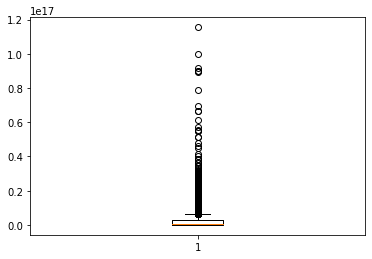

In [535]:
import matplotlib.pyplot as plt

plt.boxplot(df['duration'])

In [536]:
df.duration.describe()

count                      86994
mean     45 days 08:55:44.009931
std      88 days 22:44:57.614060
min              0 days 00:00:00
25%              1 days 00:00:00
50%              3 days 00:00:00
75%             31 days 00:00:00
max           1337 days 00:00:00
Name: duration, dtype: object

In [537]:
#범위를 1년으로 설정 
df["duration"] = df["duration"].astype('string')


In [538]:
df['duration']=df['duration'].str[0:-24]

In [541]:
df['duration'] = df["duration"].astype('int64')
df['duration']

2          419
3         1043
4           72
5            1
6            3
          ... 
213415       0
213439     259
213441      44
213443      13
213445       2
Name: duration, Length: 86994, dtype: int64

In [542]:
df.duration.describe()

count    86994.000000
mean        45.372037
std         88.947889
min          0.000000
25%          1.000000
50%          3.000000
75%         31.000000
max       1337.000000
Name: duration, dtype: float64

In [547]:
#1년 범위로 설정 한다. 
df=df[df['duration']<=365]
df.duration.describe()

count    86960.000000
mean        45.139685
std         88.033224
min          0.000000
25%          1.000000
50%          3.000000
75%         31.000000
max        365.000000
Name: duration, dtype: float64

In [551]:
df.head(100)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,tfa_date,duration
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,FEMALE,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2009-12-08,72
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,FEMALE,36.0,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US,2010-01-01,1
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,2010-01-02,3
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US,2010-01-03,10
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,2010-01-04,206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2fauin9rez,2010-03-15,20100315010643,2010-03-15,FEMALE,29.0,basic,2,en,direct,direct,linked,Web,Mac Desktop,Safari,US,2010-03-15,0
237,zfcvq4vj94,2010-03-15,20100315042100,2010-04-20,FEMALE,42.0,basic,0,en,direct,direct,linked,Web,Mac Desktop,Firefox,US,2010-03-15,36
240,8kjcxgk0sl,2010-03-15,20100315194123,2010-04-12,FEMALE,34.0,basic,0,en,other,craigslist,linked,Web,Mac Desktop,Chrome,US,2010-03-15,28
241,0p94c49eoo,2010-03-15,20100315200002,2010-03-16,FEMALE,19.0,basic,0,en,direct,direct,linked,Web,Mac Desktop,Firefox,US,2010-03-15,1


In [555]:
# we devide 4 categorical by quantile 1st 2nd 3rd 4th 
# 1st -> very fast(VF) 
# 2nd -> fast(F)
# 3rd -> slow(S) 
# 4th -> vey slow(VS)
# final categorical target value 
df['cat_duration']=df['duration']
df.loc[df['duration']<=1,'cat_duration']='VF'
df.loc[(df['duration']>1) &(df['duration']<=3),'cat_duration']='F'
df.loc[(df['duration']>3) &(df['duration']<=31),'cat_duration']='S'
df.loc[df['duration']>31,'cat_duration']='VS'

In [556]:
df.head(100)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,tfa_date,duration,cat_duration
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,FEMALE,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2009-12-08,72,VS
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,FEMALE,36.0,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US,2010-01-01,1,VF
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,2010-01-02,3,F
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US,2010-01-03,10,S
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,2010-01-04,206,VS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2fauin9rez,2010-03-15,20100315010643,2010-03-15,FEMALE,29.0,basic,2,en,direct,direct,linked,Web,Mac Desktop,Safari,US,2010-03-15,0,VF
237,zfcvq4vj94,2010-03-15,20100315042100,2010-04-20,FEMALE,42.0,basic,0,en,direct,direct,linked,Web,Mac Desktop,Firefox,US,2010-03-15,36,VS
240,8kjcxgk0sl,2010-03-15,20100315194123,2010-04-12,FEMALE,34.0,basic,0,en,other,craigslist,linked,Web,Mac Desktop,Chrome,US,2010-03-15,28,S
241,0p94c49eoo,2010-03-15,20100315200002,2010-03-16,FEMALE,19.0,basic,0,en,direct,direct,linked,Web,Mac Desktop,Firefox,US,2010-03-15,1,VF


In [599]:
# our target value 
df=df.drop(['date_account_created','date_first_booking'],axis=1)


In [578]:
# Session Merge 

sessions_id=list(df['id'].unique())
# 현재 데이터 셋에 맞는 iD 기록만  사용하기 위해 
sessions=df_session.loc[df_session['user_id'].isin(sessions_id)]



In [602]:
sessions['user_id'].unique()

array(['d1mm9tcy42', '4rvqpxoh3h', 'xwxei6hdk4', ..., 'omlc9iku7t',
       '0k26r3mir0', 'qbxza0xojf'], dtype=object)

In [579]:
sessions[sessions.action.isnull()].action_type.value_counts()

message_post    29391
Name: action_type, dtype: int64

In [580]:
sessions.loc[sessions.action.isnull(), 'action'] = 'message'

/Users/kimjong-gyu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [581]:
sessions.isnull().sum()

user_id               0
action                0
action_type      280883
action_detail    280883
device_type           0
secs_elapsed      28727
dtype: int64

In [583]:
#Missing values in action_type and action_detail
#The following are the missing values in action_type 
#and action_detail features that we have to fill, 
#and they all have the same rows that are missing.

print(sessions[sessions.action_type.isnull()].action.value_counts())
print('---')
print(sessions[sessions.action_detail.isnull()].action.value_counts())

show                     163383
lookup                    62154
track_page_view           30182
campaigns                 13818
similar_listings_v2        6530
index                      3765
uptodate                    489
localization_settings       319
signed_out_modal            169
currencies                   41
update                       19
check                        10
widget                        4
Name: action, dtype: int64
---
show                     163383
lookup                    62154
track_page_view           30182
campaigns                 13818
similar_listings_v2        6530
index                      3765
uptodate                    489
localization_settings       319
signed_out_modal            169
currencies                   41
update                       19
check                        10
widget                        4
Name: action, dtype: int64


In [584]:
# The following function finds the most common value of a feature, specific to each action, 
#then fill in action_type and action_detail.
def most_common_value_by_all_users(merge_df, feature):
    new_df = pd.DataFrame(merge_df.groupby('action')[feature].value_counts())
    new_df['index_tuple'] = new_df.index
    new_df['count'] = new_df[feature]
    new_columns = ['action', feature]
    for n, col in enumerate(new_columns):
        new_df[col] = new_df.index_tuple.apply(lambda index_tuple: index_tuple[n])
        
    new_df = new_df.reset_index(drop=True)
    new_df = new_df.drop(['index_tuple'], axis=1)
    
    new_df_max = pd.DataFrame(new_df.groupby('action', as_index=False)['count'].max())
    new_df_max = new_df_max.merge(new_df, on = ['action', 'count'])
    new_df_max = new_df_max.drop('count', axis=1)
    merge_df = merge_df.merge(new_df_max, left_on = 'action', right_on = 'action', how='left')
    
    return merge_df
sessions = most_common_value_by_all_users(sessions, 'action_type')
sessions = most_common_value_by_all_users(sessions, 'action_detail')
sessions.loc[sessions.action_type_x.isnull(), 'action_type_x'] = sessions.action_type_y
sessions.loc[sessions.action_detail_x.isnull(), 'action_detail_x'] = sessions.action_detail_y
sessions['action_type'] = sessions.action_type_x
sessions['action_detail'] = sessions.action_detail_x
sessions.drop(['action_type_x', 'action_detail_x', 'action_type_y', 'action_detail_y'], axis=1, inplace=True)




In [585]:
sessions.isnull().sum()

user_id              0
action               0
device_type          0
secs_elapsed     28727
action_type      99579
action_detail    99579
dtype: int64

In [586]:
# After that, we still have a lot of many missing values, such as missing values in action_type and action_detail where action as "similar_listings_v2", 
# "lookup" and "track_page_view" and so on.

sessions[sessions.action_type.isnull()].action.value_counts()


lookup                 62154
track_page_view        30182
similar_listings_v2     6530
uptodate                 489
signed_out_modal         169
currencies                41
check                     10
widget                     4
Name: action, dtype: int64

In [587]:
print(sessions[sessions.action == 'similar_listings'].action_type.value_counts())
print('---')
print(sessions[sessions.action == 'similar_listings'].action_detail.value_counts())

data    147196
Name: action_type, dtype: int64
---
similar_listings    147196
Name: action_detail, dtype: int64


In [588]:
# We noticed that action "similar_listing" has action_type as "data" and action_detail as "similar_listings". Therefore,
# we use those to fill action "similar_listings_v2".

sessions.loc[sessions.action == 'similar_listings_v2', 'action_type'] = 'data'
sessions.loc[sessions.action == 'similar_listings_v2', 'action_detail'] = 'similar_listings'



In [589]:
# The rest are easy, and lastly, we fill "missing" to the ones we can't find them a home.

sessions.loc[sessions.action == 'lookup', 'action_type'] = 'lookup'
sessions.loc[sessions.action == 'lookup', 'action_detail'] = 'lookup'
sessions.loc[sessions.action == 'track_page_view', 'action_type'] = 'track_page_view'
sessions.loc[sessions.action == 'track_page_view', 'action_detail'] = 'track_page_view'
sessions.action_type = sessions.action_type.fillna('missing')
sessions.action_detail = sessions.action_detail.fillna('missing')

In [590]:
sessions.isnull().sum()


user_id              0
action               0
device_type          0
secs_elapsed     28727
action_type          0
action_detail        0
dtype: int64

In [591]:
# sec_elapsed 를 채워야 한다.

sessions["secs_elapsed"] = sessions.groupby("action").transform(lambda x: x.fillna(x.median()))





In [592]:
sessions.isnull().sum()

user_id          0
action           0
device_type      0
secs_elapsed     0
action_type      0
action_detail    0
dtype: int64

In [593]:
# action_count 

sessions_new = pd.DataFrame(sessions.user_id.value_counts(sort=False))
sessions_new['action_count'] = sessions_new.user_id
sessions_new['user_id'] = sessions_new.index
sessions_new = sessions_new.reset_index(drop=True)


In [594]:
sessions_new.head()sessions_new.head()


,user_id,action_count
0,d21f68agqe,30
1,buhnlojilm,4
2,4xpmzcj00s,113
3,ber2n94dos,84
4,h4k2dp7a0n,9


In [595]:
#Most frequent value in each feature (action, action_type, action_detail, device_type)
#The following function returns the most frequent value in each feature, for a given user.

def most_frequent_value(merge_df, feature):
    # Group by the users and find the value counts of the feature
    new_df = pd.DataFrame(sessions.groupby('user_id')[feature].value_counts())
    # The index is a tuple, and we need to seperate it, so let's create a new feature from it.
    new_df['index_tuple'] = new_df.index
    # The new columns are the features created from the tuple.
    new_columns = ['user_id',feature]
    for n,col in enumerate(new_columns):
        new_df[col] = new_df.index_tuple.apply(lambda index_tuple: index_tuple[n])
    
    # Drop the old index (the tuple index)
    new_df = new_df.reset_index(drop = True)
    # Drop the unneeded feature
    new_df = new_df.drop('index_tuple', axis = 1)
    # Select the first value for each user, its most common
    new_df = new_df.groupby('user_id').first()
    
    # Set user_id equal to the index, then reset the index
    new_df['user_id'] = new_df.index
    new_df = new_df.reset_index(drop = True)
    
    merge_df = merge_df.merge(new_df)
    
    return merge_df

sessions_feature = ['action', 'action_type', 'action_detail', 'device_type']

for feature in sessions_feature:
    sessions_new = most_frequent_value(sessions_new, featu



In [596]:
sessions_new.head()

,user_id,action_count,action,action_type,action_detail,device_type
0,d21f68agqe,30,personalize,view,wishlist_content_update,Mac Desktop
1,buhnlojilm,4,cancellation_policies,view,cancellation_policies,Mac Desktop
2,4xpmzcj00s,113,show,view,view_search_results,Mac Desktop
3,ber2n94dos,84,index,click,view_search_results,Windows Desktop
4,h4k2dp7a0n,9,header_userpic,data,header_userpic,Mac Desktop


In [607]:
# sessions_new user 칼럼 이름 변경 

sessions_new.rename(columns={'user_id':'id'},inplace=True)


sessions_new.head()

,id,action_count,action,action_type,action_detail,device_type
0,d21f68agqe,30,personalize,view,wishlist_content_update,Mac Desktop
1,buhnlojilm,4,cancellation_policies,view,cancellation_policies,Mac Desktop
2,4xpmzcj00s,113,show,view,view_search_results,Mac Desktop
3,ber2n94dos,84,index,click,view_search_results,Windows Desktop
4,h4k2dp7a0n,9,header_userpic,data,header_userpic,Mac Desktop


In [608]:
# Session + train + test data set 
merge_left = pd.merge(df,sessions_new, how='inner', left_on='id', right_on='id')




In [609]:
merge_left.isnull().sum()

id                         0
timestamp_first_active     0
gender                     0
age                        0
signup_method              0
signup_flow                0
language                   0
affiliate_channel          0
affiliate_provider         0
first_affiliate_tracked    0
signup_app                 0
first_device_type          0
first_browser              0
country_destination        0
tfa_date                   0
duration                   0
cat_duration               0
action_sum                 0
action_count               0
action                     0
action_type                0
action_detail              0
device_type                0
dtype: int64

In [618]:
merge_left.columns

Index(['id', 'timestamp_first_active', 'gender', 'age', 'signup_method',
       'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination', 'tfa_date', 'duration',
       'cat_duration', 'action_sum', 'action_count', 'action', 'action_type',
       'action_detail', 'device_type'],
      dtype='object')

In [619]:
# Country CSV 
df_country=pd.read_csv("/Users/kimjong-gyu/Desktop/github/3rdBA/3rdBA/BA_TeamProject/airbnb-recruiting-new-user-bookings/countries.csv")


In [620]:
# EDA Country csv
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country_destination            10 non-null     object 
 1   lat_destination                10 non-null     float64
 2   lng_destination                10 non-null     float64
 3   distance_km                    10 non-null     float64
 4   destination_km2                10 non-null     float64
 5   destination_language           10 non-null     object 
 6   language_levenshtein_distance  10 non-null     float64
dtypes: float64(5), object(2)
memory usage: 688.0+ bytes


In [621]:
# Country + train + test + sesssion
df_final = pd.merge(merge_left, df_country, how='inner', on='country_destination')

In [622]:
df_final.isnull().sum()

id                               0
timestamp_first_active           0
gender                           0
age                              0
signup_method                    0
signup_flow                      0
language                         0
affiliate_channel                0
affiliate_provider               0
first_affiliate_tracked          0
signup_app                       0
first_device_type                0
first_browser                    0
country_destination              0
tfa_date                         0
duration                         0
cat_duration                     0
action_sum                       0
action_count                     0
action                           0
action_type                      0
action_detail                    0
device_type                      0
lat_destination                  0
lng_destination                  0
distance_km                      0
destination_km2                  0
destination_language             0
language_levenshtein